In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

In [8]:
files = [file for file in os.listdir('./Uber-dataset')]
all_data_month = pd.DataFrame()
for file in files:
    df = pd.read_csv("./Uber-dataset/"+file)
    all_data_month = pd.concat([all_data_month,df])
all_data_month.to_csv("all_data.csv",index=False)

In [9]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Date/Time,Lat,Lon,Base
0,04-01-2014 00:11,40.769,-73.9549,B02512
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN


## Drop NaN values from DataFrame

In [10]:
all_data = all_data.dropna()
all_data = all_data.reset_index(drop = True)
all_data.head()

,Date/Time,Lat,Lon,Base
0,04-01-2014 00:11,40.7690,-73.9549,B02512
1,04-01-2014 00:17,40.7267,-74.0345,B02512
2,04-01-2014 00:21,40.7316,-73.9873,B02512
3,04-01-2014 00:28,40.7588,-73.9776,B02512
4,04-01-2014 00:33,40.7594,-73.9722,B02512


# 1. Plotting data by trips during every day of the month

## 1.1 Trips Every Hour

In [14]:
# all_data['Month'] = all_data['Date/Time'].str[0:1].astype('int32')
all_data['Date/Time'] = pd.to_datetime(all_data['Date/Time'])
all_data.head()

,Date/Time,Lat,Lon,Base
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512


### Adding a month column and filtering it out

In [30]:
all_data['Month'] = all_data['Date/Time'].dt.strftime("%b")
all_data.head(1000000000000000)

,Date/Time,Lat,Lon,Base,Month
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,Apr
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,Apr
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,Apr
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,Apr
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,Apr
...,...,...,...,...,...
4534322,2014-09-30 22:57:00,40.7668,-73.9845,B02764,Sep
4534323,2014-09-30 22:57:00,40.6911,-74.1773,B02764,Sep
4534324,2014-09-30 22:58:00,40.8519,-73.9319,B02764,Sep
4534325,2014-09-30 22:58:00,40.7081,-74.0066,B02764,Sep


### Adding Hour Column and filtering out

In [37]:
all_data['Hour'] = all_data['Date/Time'].dt.hour
all_data['Count'] = 1
all_data.head(1000000000000000)

,Date/Time,Lat,Lon,Base,Month,Count,Hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,Apr,1,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,Apr,1,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,Apr,1,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,Apr,1,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,Apr,1,0
...,...,...,...,...,...,...,...
4534322,2014-09-30 22:57:00,40.7668,-73.9845,B02764,Sep,1,22
4534323,2014-09-30 22:57:00,40.6911,-74.1773,B02764,Sep,1,22
4534324,2014-09-30 22:58:00,40.8519,-73.9319,B02764,Sep,1,22
4534325,2014-09-30 22:58:00,40.7081,-74.0066,B02764,Sep,1,22


In [152]:
results = all_data.groupby('Hour').sum()
results.head()

,Lat,Lon,Count
Hour,,,
0,4.229440e+06,-7.681432e+06,103836
1,2.738356e+06,-4.973401e+06,67227
2,1.868297e+06,-3.392973e+06,45865
3,1.967077e+06,-3.572035e+06,48287
4,2.249670e+06,-4.085171e+06,55230


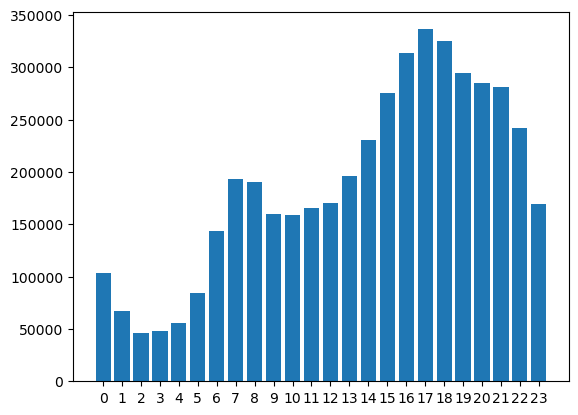

In [154]:
hour = [hour for hour, df in all_data.groupby('Hour')]
plt.bar(hour,results['Count'])
plt.xticks(hour)
plt.show()